In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd

In [2]:
'''
找出 lgrb 中所有fits文件
'''
path = r'lgrb'
files = os.listdir(path)
files_fits = []
for name in files:
    keyword = 'fits'
    if keyword in name:
        files_fits.append(os.path.join(path, name))
        
'''
读入 csv 以获取坐标信息
'''
for name in files:
    keyword = 'csv'
    if keyword in name:
        file_csv = os.path.join(path, name)

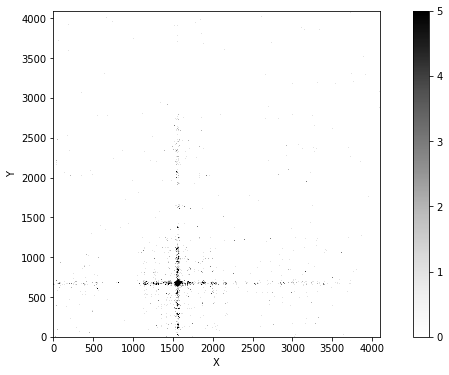

In [3]:
'''
导入数据
画完整图像
'''

data = Table.read(files_fits[0]).to_pandas()

x = np.array(data['X'])
y = np.array(data['Y'])
PI=np.array(data['PI'])
counts = np.zeros([4096,4096])
for i in range(len(x)):
    counts[x[i]][y[i]] = counts[x[i]][y[i]]+1

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
im = ax.imshow(counts.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
#cbar.minorticks_on()
#im.set_clim(0,np.percentile(counts.flatten(),98))
im.set_clim(0,5)
plt.show()

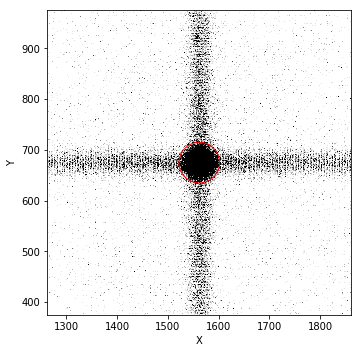

In [4]:
obs_info = pd.read_csv(file_csv)
source_point = [obs_info[' X'][0], obs_info[' Y'][0]]   # 源中心点坐标

fig = plt.figure(figsize=[12,6])

'''
局域检查
定义源区域
'''
x0, y0 = source_point[0], source_point[1]
r0 = 40   # 源半径

ax1 = fig.add_subplot(121)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(x0-300, x0+300)
ax1.set_ylim(y0-300, y0+300)
im = ax1.imshow(counts.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
#cbar.minorticks_on()
#im.set_clim(0,np.percentile(counts.flatten(),98))
im.set_clim(0,5)

circle = plt.Circle((x0, y0), r0, color='r', linewidth=1, fill=False)
plt.gcf().gca().add_artist(circle)


'''
定义背景区域
ax2 = fig.add_subplot(122)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim(3200, 3800)
ax2.set_ylim(1700, 2300)
im = ax2.imshow(counts.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
#cbar.minorticks_on()
#im.set_clim(0,np.percentile(counts.flatten(),98))
im.set_clim(0,3)

back_point = [3700,1800]   # 背景区域中心点
xb, yb = back_point[0], back_point[1]
rb = 35   # 背景区域半径
circle = plt.Circle((xb, yb), rb, color='r', linewidth=1, fill=False)
plt.gcf().gca().add_artist(circle)
'''

plt.show()

In [5]:
def event_time(df,r,center_x,center_y):   # 
    x=np.array(df['X'])
    y=np.array(df['Y'])
    value=0.
    for i in range(len(x)):
        if (x[i]-center_x)**2+(y[i]-center_y)**2<=r**2:
            value=value+1.
        else:pass
    return value

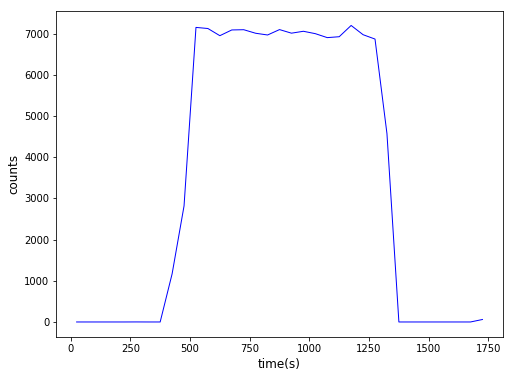

In [6]:
'''
提取时间信息
画出光变曲线
'''

time = np.array(data['TIME'])   # 提取时间信息
dt = 50   # 时间步长

xgrade = np.arange(time.min(),time.max()+dt,dt)
value = []
for i in range(1,len(xgrade)):
    df = data[(data['TIME']>=xgrade[i-1]) & (data['TIME']<xgrade[i])]
    value.append(event_time(df,r0,x0,y0))
value = np.array(value)
xgrade = xgrade-time[0]
value_x = (xgrade[:-1]+xgrade[1:])/2.

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('counts',fontsize=12)
#ax.scatter(value_x,value,c='blue',marker='o',s=1.5)
ax.plot(value_x,value,'b-',linewidth=1,markersize=4)
plt.show()

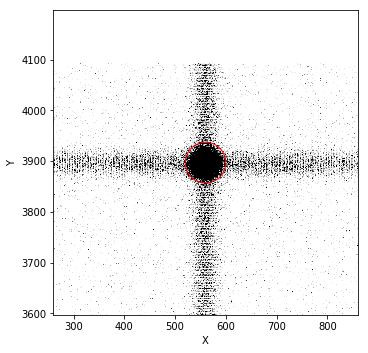

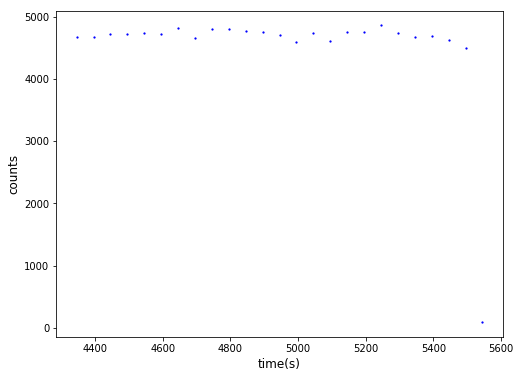

In [21]:
'''
检查第二次观测
检验半径选取的合适程度
'''
data_0 = Table.read(files_fits[0]).to_pandas()
time_0 = np.array(data_0['TIME'])

data = Table.read(files_fits[1]).to_pandas()

x = np.array(data['X'])
y = np.array(data['Y'])
PI=np.array(data['PI'])
counts = np.zeros([4096,4096])
for i in range(len(x)):
    counts[x[i]][y[i]] = counts[x[i]][y[i]]+1
    
    
obs_info = pd.read_csv(file_csv)
source_point = [obs_info[' X'][1], obs_info[' Y'][1]]   # 源中心点坐标

fig = plt.figure(figsize=[12,6])

x0, y0 = source_point[0], source_point[1]
r0 = 40   # 源半径

ax1 = fig.add_subplot(121)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(x0-300, x0+300)
ax1.set_ylim(y0-300, y0+300)
im = ax1.imshow(counts.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
#cbar.minorticks_on()
#im.set_clim(0,np.percentile(counts.flatten(),98))
im.set_clim(0,5)

circle = plt.Circle((x0, y0), r0, color='r', linewidth=1, fill=False)
plt.gcf().gca().add_artist(circle)

time = np.array(data['TIME'])   # 提取时间信息
dt = 50   # 时间步长

xgrade = np.arange(time.min(),time.max()+dt,dt)
value = []
for i in range(1,len(xgrade)):
    df = data[(data['TIME']>=xgrade[i-1]) & (data['TIME']<xgrade[i])]
    value.append(event_time(df,r0,x0,y0))
value = np.array(value)
xgrade = xgrade-time_0.min()
value_x = (xgrade[:-1]+xgrade[1:])/2.

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('counts',fontsize=12)
ax.scatter(value_x,value,c='blue',marker='o',s=1.5)
plt.show()